In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/MLDL/Progetto/BiseNetv1
!pip install tensorboardX

Mounted at /content/drive
/content/drive/MyDrive/MLDL/Progetto/BiseNetv1


In [ ]:
!python train.py

epoch 0, lr 0.025000: 100% 500/500 [14:49<00:00,  1.78s/it, loss=1.350528]
loss for train : 2.587890
epoch 1, lr 0.024550: 100% 500/500 [11:16<00:00,  1.35s/it, loss=1.408606]
loss for train : 1.438000
epoch 2, lr 0.024098: 100% 500/500 [11:11<00:00,  1.34s/it, loss=1.158063]
loss for train : 1.187436
epoch 3, lr 0.023646:  63% 316/500 [07:03<04:05,  1.34s/it, loss=0.983792]

torch.Size([3, 512, 1024])
torch.Size([512, 1024])


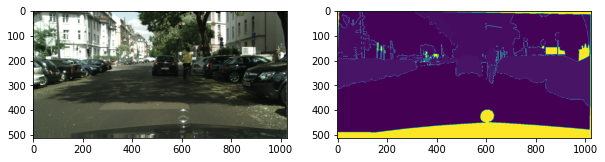

In [1]:
from dataset.Cityscapes import Cityscapes
import matplotlib.pyplot as plt
import numpy as np

dataset_train = Cityscapes('../Cityscapes', 'val', [512, 1024])

img, lbl = dataset_train[0]

fig, axarr = plt.subplots(1, 2, figsize=(10,10))
axarr[0].imshow((img.permute(1,2,0)).numpy().astype(np.uint8))
axarr[1].imshow(lbl)

print(img.shape)
print(lbl.shape)

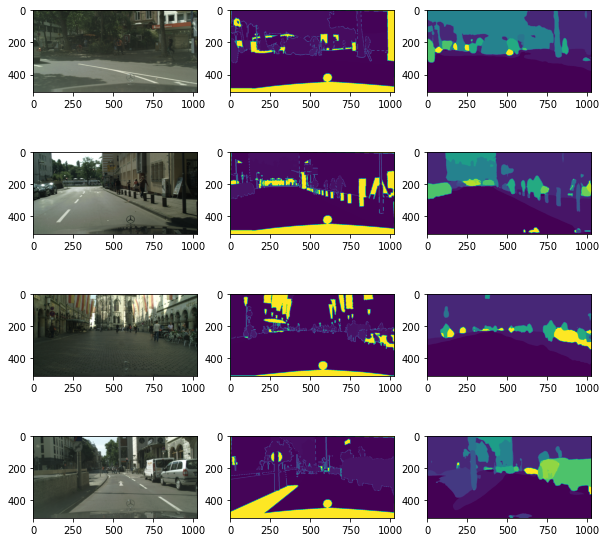

In [20]:
from dataset.Cityscapes import Cityscapes
from torch.utils.data import DataLoader
import torch
from model.build_BiSeNet import BiSeNet
from utils import reverse_one_hot

batch_size = 4
dataset_train = Cityscapes('../Cityscapes', 'val', [512, 1024])
dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
img_batch, lbl_batch = next(iter(dataloader_train))

model = BiSeNet(19, "resnet101")
model.load_state_dict(torch.load('checkpoints_101_sgd/latest_dice_loss.pth'))
model.eval()

with torch.no_grad():
    fig, axarr = plt.subplots(batch_size, 3, figsize=(10,10))
    pred_batch = model(img_batch)
    for idx in range(batch_size):
        axarr[idx,0].imshow((img_batch[idx].permute(1,2,0)).numpy().astype(np.uint8))
        axarr[idx,1].imshow(lbl_batch[idx])
        axarr[idx,2].imshow(reverse_one_hot(pred_batch).numpy()[idx])

In [ ]:
import torch

print(torch.cuda.get_device_name(0))

Tesla T4
